### Introduction

Creditworthiness prediction is of paramount importance in the financial industry as it plays a crucial role in mitigating risks and ensuring the stability of lending institutions. By harnessing advanced analytics and machine learning algorithms, financial institutions can assess the creditworthiness of potential borrowers more accurately. This proactive approach enables lenders to identify and flag high-risk individuals or businesses, reducing the likelihood of defaults. Predictive models analyze a numerous variables, such as credit history, income stability, loan premium, LTV etc. and providing a comprehensive evaluation of a borrower's ability to repay a loan. Timely prediction of loan defaults not only protects financial institutions from potential financial losses but also fosters responsible lending practices. Ultimately, the ability to forecast loan defaults empowers lenders to make informed decisions, maintain a healthy loan portfolio, and contribute to the overall stability of the financial system.

The note book covers the model building process followed to build a predictive model for loan defaults.

kaggle [dataset](https://www.kaggle.com/datasets/gauravduttakiit/bank-fears-loanliness) on loan portfolio status had been used to develop the predictive model.

### Imported required packages

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

#Data preprocessing and pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures,LabelEncoder
from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImPipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV,cross_validate
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')


#visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Model evaluation algorithms
from scipy import stats
from sklearn.metrics import recall_score,accuracy_score, precision_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.metrics import RocCurveDisplay,roc_auc_score


# Classifier Algorithms
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge,LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost
from sklearn.feature_selection import SelectKBest

#To save_models
import pickle

## 1. Creating DataFrame & Data Understanding

### 1.1 Upload training and test data

In this notebook, we load up our cleaned train and test data (see cleaning notebook for process) and iterate through several modeling algorithms.

In [2]:
# load data to df_test dataframe
df_test = pd.read_csv('Data/Loan_Default_test_cleaned.csv', index_col=0)

In [3]:
df_test.shape

(125203, 45)

In [4]:
df_test.head()

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_last_major_derog,mths_since_last_record,mths_since_last_delinq,batch_enrolled,loan_amnt,funded_amnt,funded_amnt_inv,...,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,loan_status,Annual_Total_premium,PTI,LTI
member_id,,,,,,,,,,,,,,,,,,,,,
32157702,0.0,68305.0,21900.0,44.0,70.0,7.0,BAT2078974,2000,2000,2000.0,...,0.0,0.0,0.0,INDIVIDUAL,65th week,0.0,0,812.706742,0.013108,0.032258
59571650,0.0,36306.0,10500.0,50.0,37.0,50.0,BAT3873588,10000,10000,10000.0,...,0.0,0.0,0.0,INDIVIDUAL,22th week,0.0,0,3719.533417,0.053182,0.142980
33338943,0.0,15866.0,38640.0,98.0,70.0,57.0,BAT2078974,15000,15000,15000.0,...,0.0,0.0,0.0,INDIVIDUAL,65th week,0.0,0,4234.151626,0.044570,0.157895
19767045,0.0,153926.0,7000.0,50.0,70.0,50.0,BAT3461431,6500,6500,6500.0,...,0.0,0.0,0.0,INDIVIDUAL,56th week,0.0,1,2578.439439,0.053717,0.135417
1332598,0.0,0.0,10000.0,44.0,70.0,35.0,BAT5046385,7875,7875,7875.0,...,0.0,0.0,0.0,INDIVIDUAL,157th week,0.0,1,3288.382140,0.102762,0.246094


In [5]:
# load data to df_train dataframe
df_train = pd.read_csv('Data/Loan_Default_train_cleaned.csv', index_col=0)

In [6]:
df_train.shape

(375608, 45)

In [7]:
df_train.head()

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_last_major_derog,mths_since_last_record,mths_since_last_delinq,batch_enrolled,loan_amnt,funded_amnt,funded_amnt_inv,...,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,loan_status,Annual_Total_premium,PTI,LTI
member_id,,,,,,,,,,,,,,,,,,,,,
1485851,0.0,0.0,15000.0,44.0,70.0,31.0,BAT3372536,24000,24000,24000.0,...,1267.46,11.67,0.0,INDIVIDUAL,61th week,0.0,0,8318.641153,0.103983,0.300000
59728839,0.0,448556.0,153900.0,44.0,70.0,31.0,BAT3873588,25000,25000,25000.0,...,0.00,0.00,0.0,INDIVIDUAL,22th week,0.0,0,9034.434386,0.086042,0.238095
26348727,0.0,18255.0,37300.0,44.0,70.0,31.0,BAT2333412,11200,11200,11200.0,...,0.00,0.00,0.0,INDIVIDUAL,74th week,0.0,0,4235.829931,0.105896,0.280000
53714022,0.0,65274.0,49800.0,54.0,70.0,28.0,BAT1184694,15000,15000,15000.0,...,0.00,0.00,0.0,INDIVIDUAL,31th week,0.0,0,5495.544074,0.091592,0.250000
56449016,0.0,365694.0,19200.0,44.0,70.0,3.0,BAT3873588,10000,10000,10000.0,...,0.00,0.00,0.0,INDIVIDUAL,13th week,0.0,0,3928.077802,0.029314,0.074627


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375608 entries, 1485851 to 56428627
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   tot_coll_amt                 375608 non-null  float64
 1   tot_cur_bal                  375608 non-null  float64
 2   total_rev_hi_lim             375608 non-null  float64
 3   mths_since_last_major_derog  375608 non-null  float64
 4   mths_since_last_record       375608 non-null  float64
 5   mths_since_last_delinq       375608 non-null  float64
 6   batch_enrolled               375608 non-null  object 
 7   loan_amnt                    375608 non-null  int64  
 8   funded_amnt                  375608 non-null  int64  
 9   funded_amnt_inv              375608 non-null  float64
 10  term                         375608 non-null  int64  
 11  int_rate                     375608 non-null  float64
 12  grade                        375608 non-null  obje

## 2. Data Preparation

Assiging numeric columns to 'numcols' and categorical columns to 'catcols' to use in the pipe line.

In [9]:
numcols = ['loan_amnt','emp_length','funded_amnt','int_rate', 'annual_inc','dti','open_acc','pub_rec','revol_bal','revol_util','total_acc','Annual_Total_premium','PTI','term','inq_last_6mths','LTI']

In [10]:
catcols = ['grade','sub_grade','home_ownership','verification_status', 'pymnt_plan','purpose','addr_state','initial_list_status','application_type']

Define response and explanatory variables. Thereadfter split the train dataset into training data set and validation data set. validation set size is 25% of the total dataset. random state of 42. The validation set is to be used in the final model validation. For the model building process train and test datasets to be used. 

In [11]:
X_tol_train = df_train.drop(['loan_status'],axis=1) 
X_test = df_test.drop(['loan_status'],axis=1)
y_tol_train = df_train['loan_status']
y_test = df_test['loan_status']

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_tol_train, y_tol_train, random_state=42, test_size=0.2)

## 3. Define Pipeline

Define sub pipelines to use in column transformer.

In [13]:
subpipe_numerics =Pipeline(steps =[
    ('ss',StandardScaler())      
])
    
subpipe_cat =Pipeline([
    ('ohe',OneHotEncoder(sparse=False, handle_unknown='ignore')) 
])

In [14]:
CT = ColumnTransformer(transformers=[
    ('subpipe_num', subpipe_numerics,numcols),
    ('subpipe_cate', subpipe_cat,catcols)  
],remainder='drop')

Define sub pipelines with polynomial features to use in column transformer.

In [15]:
subpipe_numerics1 =Pipeline(steps =[
    ('poly',PolynomialFeatures()),
    ('ss',StandardScaler())
])
    
subpipe_cat1 =Pipeline([
    ('ohe',OneHotEncoder(sparse=False, handle_unknown='ignore')) 
])

In [16]:
CT_poly = ColumnTransformer(transformers=[
    ('subpipe_num', subpipe_numerics1,numcols),
    ('subpipe_cate', subpipe_cat1,catcols)
],remainder='drop')

## 4. Defining Functions for Model Evaluation

Function is defined to iteratively throw different algorithms and evaluate the models accordingly. The function will fit the model and evaluate the performance in terms of train score,test score, logloss on train data, logloss on test data,cross validation based on f1 score, classifcation report, confusion matrix and roc curve. 

In [17]:
def model_eval(estimator,X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,CT=CT):
    '''
    function will print the model,train score,test score, logloss on train data,logloss on test data,
    cross validation based on f1 score, classifcation report, confusion matrix and roc curve.
    
    Parameters:
    estimator - model algorithm
    X_train - independent train data
    X_test - independent test data
    y_train - target train data
    y_test - target test data
    CT - Columntransformer
    '''
    
    warnings.filterwarnings('ignore')
    model_name = type(estimator).__name__
    model = Pipeline(steps=[
    ('ct',CT),
    ('model',estimator)])

    model.fit(X_train,y_train)
    
    print(f'below are the model evaluation statistics of {model}')
    print(f' train_score : {round(model.score(X_train,y_train),4)}')
    print(f' test_score : {round(model.score(X_test,y_test),4)}')
    print(f' log loss on training dataset : {round(log_loss(y_train, model.predict_proba(X_train)),4)}')
    print(f' log loss on test dataset : {round(log_loss(y_test, model.predict_proba(X_test)),4)}')
    print(f'CrossValidation on training dataset : {cross_val_score(model,X_train,y_train,scoring="f1").mean()}')
    
    print('classification_report')
    print(classification_report(y_test, model.predict(X_test)))
    
    cm = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    cm.ax_.set_title('Conf Matrix on Test Data')
    
    RocCurveDisplay.from_estimator(model, X_test, y_test)

This function is defined only to evaluate the performance of the fitted model. This will evaluate the performance in terms of train score,test score, logloss on train data, logloss on test data,cross validation based on f1 score, classifcation report, confusion matrix and roc curve.

In [18]:
def model_eff(estimator,X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    '''
    function will print the model,train score,test score, logloss on train data,logloss on test data,
    cross validation based on f1 score, classifcation report, confusion matrix and roc curve.
    
    Parameters:
    estimator - model algorithm
    X_train - independent train data
    X_test - independent test data
    y_train - target train data
    y_test - target test data
    '''
    
    
    
    warnings.filterwarnings('ignore')
    
    print(f'below are the model evaluation statistics of {estimator}')
    print(f' train_score : {round(estimator.score(X_train,y_train),4)}')
    print(f' test_score : {round(estimator.score(X_test,y_test),4)}')
    print(f' log loss on training dataset : {round(log_loss(y_train, estimator.predict_proba(X_train)),4)}')
    print(f' log loss on test dataset : {round(log_loss(y_test, estimator.predict_proba(X_test)),4)}')
    print(f'CrossValidation on training dataset : {cross_val_score(estimator,X_train,y_train,scoring="f1").mean()}')
    
    print('classification_report')
    print(classification_report(y_test, estimator.predict(X_test)))
    
    cm = ConfusionMatrixDisplay.from_estimator(estimator, X_test, y_test)
    cm.ax_.set_title('Conf Matrix on Test Data')
    
    RocCurveDisplay.from_estimator(estimator, X_test, y_test)

## 5. Model Building

### 5.1 Create Dummy/Baseline ModelDummy Model

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

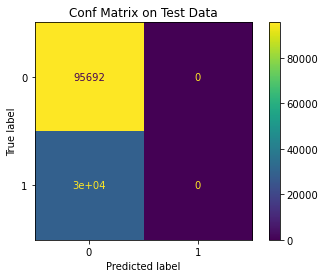

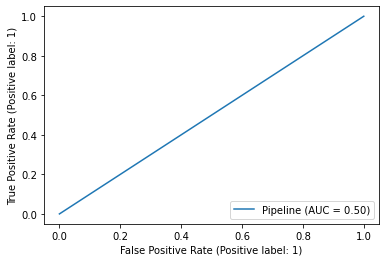

In [18]:
model_eval(DummyClassifier())

### Dummy Model Interpretation

Dummy model sets the baseline for the model development with a score on train data set as 0.7611 and score on test data set as 0.7643. The log loss values for training set is 0.5498 while on test set it is 0.5461. The area under the ROC curve is 0.5 which indicates there is higher potential to develop a better model. The confusion matrix had produced imbalanced results.

### 5.2 Logistic Regression Models

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

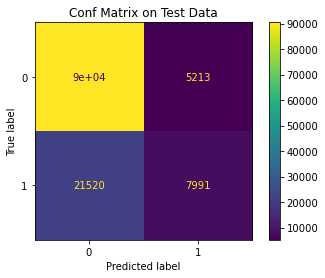

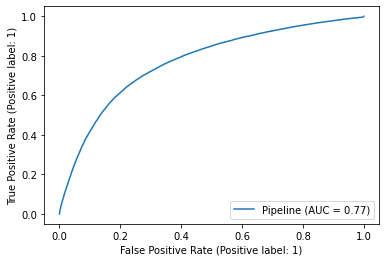

In [52]:
model_eval(LogisticRegression())

### 5.2.1 Logistic Regression Grid Search

In [68]:
LRG_clf = LogisticRegression()
pipeline_LRG = Pipeline(steps=[
    ('ct',CT),
    ('classifier', LRG_clf)])

pipeline_LRG.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                                 ('subpipe_cate',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['grade', 'sub_grade',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'pymnt_plan', 'purpose',
                                                   'addr_state',
                                                   'initial_list_status',
                                                   'application_type'])])),
                ('classifier', LogisticRegression())])

In [74]:
pipeline_LRG.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'ct', 'classifier', 'ct__n_jobs', 'ct__remainder', 'ct__sparse_threshold', 'ct__transformer_weights', 'ct__transformers', 'ct__verbose', 'ct__verbose_feature_names_out', 'ct__subpipe_num', 'ct__subpipe_cate', 'ct__subpipe_num__memory', 'ct__subpipe_num__steps', 'ct__subpipe_num__verbose', 'ct__subpipe_num__ss', 'ct__subpipe_num__ss__copy', 'ct__subpipe_num__ss__with_mean', 'ct__subpipe_num__ss__with_std', 'ct__subpipe_cate__memory', 'ct__subpipe_cate__steps', 'ct__subpipe_cate__verbose', 'ct__subpipe_cate__ohe', 'ct__subpipe_cate__ohe__categories', 'ct__subpipe_cate__ohe__drop', 'ct__subpipe_cate__ohe__dtype', 'ct__subpipe_cate__ohe__handle_unknown', 'ct__subpipe_cate__ohe__max_categories', 'ct__subpipe_cate__ohe__min_frequency', 'ct__subpipe_cate__ohe__sparse', 'ct__subpipe_cate__ohe__sparse_output', 'classifier__C', 'classifier__class_weight', 'classifier__dual', 'classifier__fit_intercept', 'classifier__intercept_scaling', 'classifier__l1_rat

In [75]:
parameters = {'classifier__solver' : ['newton-cg', 'lbfgs', 'liblinear'],
              'classifier__penalty' : ['l1','l2'],
              'classifier__C' : [100, 10, 1.0, 0.1, 0.01]}

In [76]:
gs_logistic = GridSearchCV(
    estimator=pipeline_LRG,
    param_grid=parameters,
    cv=5,
    verbose=1
)

In [78]:
gs_logistic.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         ['loan_amnt',
                                                                          'emp_length',
                                                                          'funded_amnt',
                                                                          'int_rate',
                                                                          'annual_inc',
                                                                          'dti',
                                                                          'open_acc',
                                                                          'pub_rec',
                                                                          'revol_bal',
                                                                          'revol_util',
                                                                          'total_acc',
                                                                          'Annual_Total_premium',
                                                                          'PTI',
                                                                          'term',
                                                                          'inq_last_6mths',
                                                                          'LTI']),
                                                                        ('subpipe_cate',
                                                                         Pipeli...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['grade',
                                                                          'sub_grade',
                                                                          'home_ownership',
                                                                          'verification_status',
                                                                          'pymnt_plan',
                                                                          'purpose',
                                                                          'addr_state',
                                                                          'initial_list_status',
                                                                          'application_type'])])),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [100, 10, 1.0, 0.1, 0.01],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['newton-cg', 'lbfgs',
                                                'liblinear']},
             verbose=1)

In [79]:
gs_logistic.best_params_

{'classifier__C': 10,
 'classifier__penalty': 'l2',
 'classifier__solver': 'liblinear'}

In [86]:
gs_logistic_best=gs_logistic.best_estimator_

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

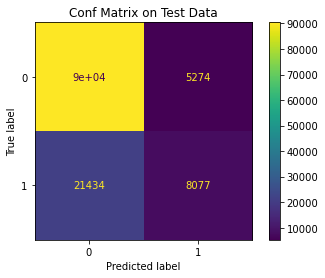

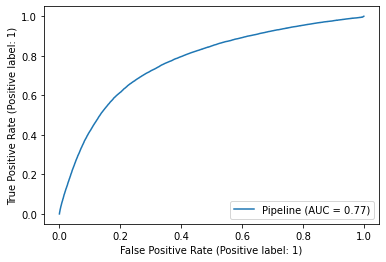

In [87]:
model_eff(gs_logistic_best)

### Interpretation of Logistic Regression Model

Compared to Dummy model, logistic regression model arrived after hyper parameter tunning have shown significantly improved results where train score is 0.784 while test score is 0.7867. Also logloss has reduced to 0.466 on train data and 0.4671 on test data. 
The f1 score on cross validation has shown improved score of 0.37 while accuracy on classification summary 0.79. The area under ROC curve is 0.77. These stat shows improvement from the dummy model but have to improve further model to generate results with higher accuracy.

### 5.3 Logistic Regression with Polinomial Features

To inspect the model with increased complexity, polynomial features inroduced to the logistic regression model.

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                      

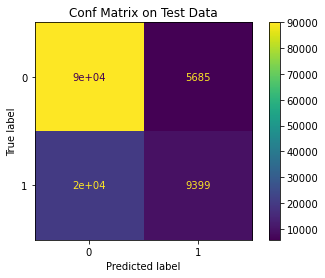

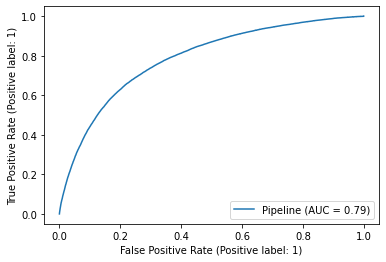

In [101]:
model_eval(LogisticRegression(),CT=CT_poly)

### Interpretation of Logistic Regression Model with Polynomial Features

By introducing the polynomial features to the model, the model performance had increased marginally compared to logistic model without polynomial features. The train score has increased to 0.7909 compared 0.784 in the logistic model. Also test score has increased to 0.794. On the other hand log loss has reduced to 0.4511 and 0.4471 on train and test data respectively. Also f1 score on cross validation has increased by about 0.05 and area under ROC curve by 0.02 compared to logistic model without polynomial features.

### 5.4 Gradient Boost Model

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

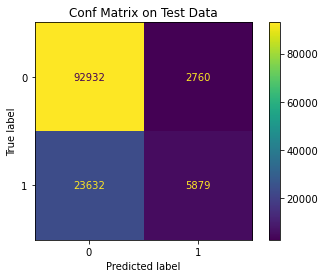

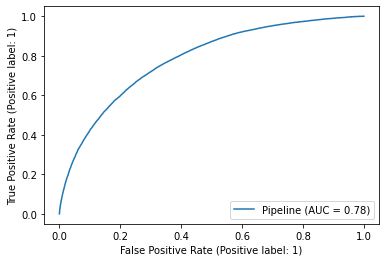

In [73]:
model_eval(GradientBoostingClassifier(learning_rate=0.1,max_depth=3))

With different combinations of parameters gradient boost achieved best score on train data is 0.7878 and test data is 0.7892. This is a similar performance shown with the logistic model.

### 5.5 XGBoost Model

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

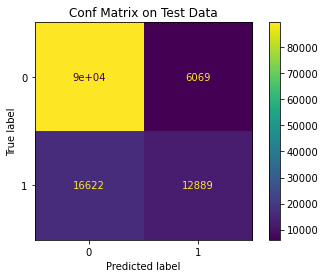

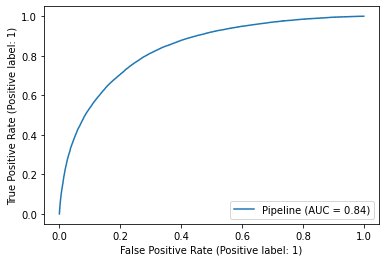

In [58]:
model_eval(XGBClassifier())

The XGboost model with default parameters produced significantly better results compared to other models. The train score is 0.8276 while test score is 0.8188. Also logloss on test data has reduced to 0.4 and f1 score has increased upto 0.52. This has given the indication this model could be the best and it was decided to hyper tune the parameters and observe the results.

### 5.5.1 XGBoost Model Grid Search 1

In [72]:
XGB_clf = XGBClassifier()
pipeline_XB = Pipeline(steps=[
    ('ct',CT),
    ('classifier', XGB_clf)])

pipeline_XB.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                                 ('subpipe_cate',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncod...
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [73]:
pipeline_XB.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'ct', 'classifier', 'ct__n_jobs', 'ct__remainder', 'ct__sparse_threshold', 'ct__transformer_weights', 'ct__transformers', 'ct__verbose', 'ct__verbose_feature_names_out', 'ct__subpipe_num', 'ct__subpipe_cate', 'ct__subpipe_num__memory', 'ct__subpipe_num__steps', 'ct__subpipe_num__verbose', 'ct__subpipe_num__ss', 'ct__subpipe_num__ss__copy', 'ct__subpipe_num__ss__with_mean', 'ct__subpipe_num__ss__with_std', 'ct__subpipe_cate__memory', 'ct__subpipe_cate__steps', 'ct__subpipe_cate__verbose', 'ct__subpipe_cate__ohe', 'ct__subpipe_cate__ohe__categories', 'ct__subpipe_cate__ohe__drop', 'ct__subpipe_cate__ohe__dtype', 'ct__subpipe_cate__ohe__handle_unknown', 'ct__subpipe_cate__ohe__max_categories', 'ct__subpipe_cate__ohe__min_frequency', 'ct__subpipe_cate__ohe__sparse', 'ct__subpipe_cate__ohe__sparse_output', 'classifier__objective', 'classifier__base_score', 'classifier__booster', 'classifier__colsample_bylevel', 'classifier__colsample_bynode', 'classi

In [74]:
params ={
    'classifier__n_estimators':[75,100,125],
    'classifier__learning_rate':[0.1,0.3,0.4],
    'classifier__max_depth' :[4,7,10],
    'classifier__reg_lambda': [0,1]    
  }

In [75]:
gs = GridSearchCV(
    estimator=pipeline_XB,
    param_grid=params,
    cv=5,
    verbose=1
)

In [76]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         ['loan_amnt',
                                                                          'emp_length',
                                                                          'funded_amnt',
                                                                          'int_rate',
                                                                          'annual_inc',
                                                                          'dti',
                                                                          'open_acc',
                                                                          'pub_rec',
                                                                          'revol_bal',
                                                                          'revol_util',
                                                                          'total_acc',
                                                                          'Annual_Total_premium',
                                                                          'PTI',
                                                                          'term',
                                                                          'inq_last_6mths',
                                                                          'LTI']),
                                                                        ('subpipe_cate',
                                                                         Pipeli...
                                                      monotone_constraints='()',
                                                      n_estimators=100,
                                                      n_jobs=0,
                                                      num_parallel_tree=1,
                                                      random_state=0,
                                                      reg_alpha=0, reg_lambda=1,
                                                      scale_pos_weight=1,
                                                      subsample=1,
                                                      tree_method='exact',
                                                      validate_parameters=1,
                                                      verbosity=None))]),
             param_grid={'classifier__learning_rate': [0.1, 0.3, 0.4],
                         'classifier__max_depth': [4, 7, 10],
                         'classifier__n_estimators': [75, 100, 125],
                         'classifier__reg_lambda': [0, 1]},
             verbose=1)

In [77]:
gs.best_params_

{'classifier__learning_rate': 0.1,
 'classifier__max_depth': 10,
 'classifier__n_estimators': 125,
 'classifier__reg_lambda': 1}

In [ ]:
# save the grid search model
filename = 'Model/Xgboost_model.sav'
pickle.dump(gs, open(filename, 'wb'))

In [ ]:
gs_model = pickle.load(open(filename, 'rb'))

In [78]:
gs_best=gs.best_estimator_

In [79]:
gs_train_score = round(gs_model.score(X_train,y_train),4)
gs_train_score

0.852

In [80]:
gs_test_score= round(gs_model.score(X_test,y_test),4)
gs_test_score

0.8202

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

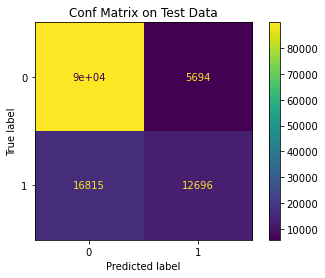

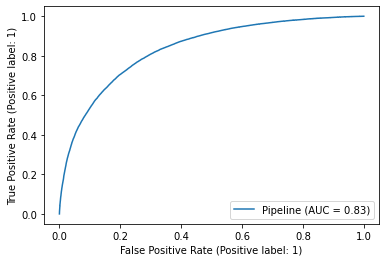

In [56]:
model_eval(XGBClassifier(learning_rate=0.1,max_depth=10,n_estimators = 125,reg_lambda =1))

### XGBoost Model Grid Search 2

In [31]:
XGB_clf1 = XGBClassifier(learning_rate=0.1,max_depth=10,n_estimators = 125,reg_lambda =1)
pipeline_XB1 = Pipeline(steps=[
    ('ct',CT),
    ('classifier', XGB_clf1)])

pipeline_XB1.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                                 ('subpipe_cate',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncod...
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=10,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=125,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [32]:
pipeline_XB1.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'ct', 'classifier', 'ct__n_jobs', 'ct__remainder', 'ct__sparse_threshold', 'ct__transformer_weights', 'ct__transformers', 'ct__verbose', 'ct__verbose_feature_names_out', 'ct__subpipe_num', 'ct__subpipe_cate', 'ct__subpipe_num__memory', 'ct__subpipe_num__steps', 'ct__subpipe_num__verbose', 'ct__subpipe_num__ss', 'ct__subpipe_num__ss__copy', 'ct__subpipe_num__ss__with_mean', 'ct__subpipe_num__ss__with_std', 'ct__subpipe_cate__memory', 'ct__subpipe_cate__steps', 'ct__subpipe_cate__verbose', 'ct__subpipe_cate__ohe', 'ct__subpipe_cate__ohe__categories', 'ct__subpipe_cate__ohe__drop', 'ct__subpipe_cate__ohe__dtype', 'ct__subpipe_cate__ohe__handle_unknown', 'ct__subpipe_cate__ohe__max_categories', 'ct__subpipe_cate__ohe__min_frequency', 'ct__subpipe_cate__ohe__sparse', 'ct__subpipe_cate__ohe__sparse_output', 'classifier__objective', 'classifier__base_score', 'classifier__booster', 'classifier__colsample_bylevel', 'classifier__colsample_bynode', 'classi

In [38]:
params ={
    'classifier__booster':['gbtree', 'dart'],
    'classifier__subsample':[0.5,0.7,0.8],
     'classifier__colsample_bytree' :[0.5,0.7,0.9]
  }

In [39]:
gs1 = GridSearchCV(
    estimator=pipeline_XB1,
    param_grid=params,
    cv=5,
    verbose=1
)

In [40]:
gs1.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         ['loan_amnt',
                                                                          'emp_length',
                                                                          'funded_amnt',
                                                                          'int_rate',
                                                                          'annual_inc',
                                                                          'dti',
                                                                          'open_acc',
                                                                          'pub_rec',
                                                                          'revol_bal',
                                                                          'revol_util',
                                                                          'total_acc',
                                                                          'Annual_Total_premium',
                                                                          'PTI',
                                                                          'term',
                                                                          'inq_last_6mths',
                                                                          'LTI']),
                                                                        ('subpipe_cate',
                                                                         Pipeli...
                                                      monotone_constraints='()',
                                                      n_estimators=125,
                                                      n_jobs=0,
                                                      num_parallel_tree=1,
                                                      random_state=0,
                                                      reg_alpha=0, reg_lambda=1,
                                                      scale_pos_weight=1,
                                                      subsample=1,
                                                      tree_method='exact',
                                                      validate_parameters=1,
                                                      verbosity=None))]),
             param_grid={'classifier__booster': ['gbtree', 'dart'],
                         'classifier__colsample_bytree': [0.5, 0.7, 0.9],
                         'classifier__subsample': [0.5, 0.7, 0.8]},
             verbose=1)

In [42]:
gs1.best_params_

{'classifier__booster': 'gbtree',
 'classifier__colsample_bytree': 0.5,
 'classifier__subsample': 0.8}

In [44]:
filename = 'Model/Xgboost_model1.sav'

In [45]:
pickle.dump(gs1, open(filename, 'wb'))

In [46]:
gs_best1 = pickle.load(open(filename, 'rb'))

In [47]:
gs_train_score = round(gs_best1.score(X_train,y_train),4)
gs_train_score

0.8502

In [48]:
gs_test_score= round(gs_best1.score(X_test,y_test),4)
gs_test_score

0.8217

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

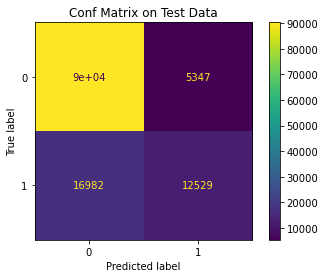

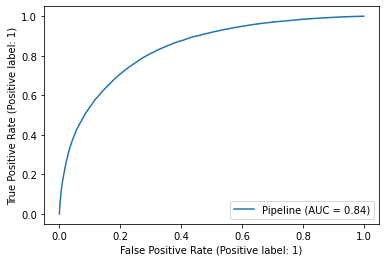

In [54]:
model_eval(XGBClassifier(learning_rate=0.1,max_depth=10,n_estimators = 125,reg_lambda =1,booster='gbtree',colsample_bytree=0.5,subsample=0.8))

### XGBoost Model Grid Search 3

In [71]:
XGB2 = XGBClassifier()
pipeline_XG2 = Pipeline(steps=[
    ('ct',CT),
    ('classifier', XGB2)])

pipeline_XG2.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                                 ('subpipe_cate',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncod...
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [72]:
pipeline_XG2.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'ct', 'classifier', 'ct__n_jobs', 'ct__remainder', 'ct__sparse_threshold', 'ct__transformer_weights', 'ct__transformers', 'ct__verbose', 'ct__verbose_feature_names_out', 'ct__subpipe_num', 'ct__subpipe_cate', 'ct__subpipe_num__memory', 'ct__subpipe_num__steps', 'ct__subpipe_num__verbose', 'ct__subpipe_num__ss', 'ct__subpipe_num__ss__copy', 'ct__subpipe_num__ss__with_mean', 'ct__subpipe_num__ss__with_std', 'ct__subpipe_cate__memory', 'ct__subpipe_cate__steps', 'ct__subpipe_cate__verbose', 'ct__subpipe_cate__ohe', 'ct__subpipe_cate__ohe__categories', 'ct__subpipe_cate__ohe__drop', 'ct__subpipe_cate__ohe__dtype', 'ct__subpipe_cate__ohe__handle_unknown', 'ct__subpipe_cate__ohe__max_categories', 'ct__subpipe_cate__ohe__min_frequency', 'ct__subpipe_cate__ohe__sparse', 'ct__subpipe_cate__ohe__sparse_output', 'classifier__objective', 'classifier__base_score', 'classifier__booster', 'classifier__colsample_bylevel', 'classifier__colsample_bynode', 'classi

In [ ]:
#Define the hyperparameters to tune
params ={
    'classifier__n_estimators':[125,150,175],
    'classifier__learning_rate':[0.05,0.1],
    'classifier__max_depth' :[10,12,14] 
  }

#Define the grid search 
gs_XG = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=params,
    cv=5,
    verbose=1
)

#Fit the grid search model
gs_XG.fit(X_train,y_train)

In [73]:
params ={
    'classifier__n_estimators':[125,150,175],
    'classifier__learning_rate':[0.05,0.1],
    'classifier__max_depth' :[10,12,14] 
  }

In [75]:
gs_XG = GridSearchCV(
    estimator=pipeline_XG2,
    param_grid=params,
    cv=5,
    verbose=1
)

In [76]:
gs_XG.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         ['loan_amnt',
                                                                          'emp_length',
                                                                          'funded_amnt',
                                                                          'int_rate',
                                                                          'annual_inc',
                                                                          'dti',
                                                                          'open_acc',
                                                                          'pub_rec',
                                                                          'revol_bal',
                                                                          'revol_util',
                                                                          'total_acc',
                                                                          'Annual_Total_premium',
                                                                          'PTI',
                                                                          'term',
                                                                          'inq_last_6mths',
                                                                          'LTI']),
                                                                        ('subpipe_cate',
                                                                         Pipeli...
                                                      missing=nan,
                                                      monotone_constraints='()',
                                                      n_estimators=100,
                                                      n_jobs=0,
                                                      num_parallel_tree=1,
                                                      random_state=0,
                                                      reg_alpha=0, reg_lambda=1,
                                                      scale_pos_weight=1,
                                                      subsample=1,
                                                      tree_method='exact',
                                                      validate_parameters=1,
                                                      verbosity=None))]),
             param_grid={'classifier__learning_rate': [0.05, 0.1],
                         'classifier__max_depth': [10, 12, 14],
                         'classifier__n_estimators': [125, 150, 175]},
             verbose=1)

In [81]:
filename = 'Model/Xgboost_model2.sav'

In [82]:
pickle.dump(gs_XG, open(filename, 'wb'))

In [83]:
gs_best2 = pickle.load(open(filename, 'rb'))

In [84]:
gs_XG.best_params_

{'classifier__learning_rate': 0.1,
 'classifier__max_depth': 10,
 'classifier__n_estimators': 175}

In [86]:
gs_best2.score(X_train,y_train)

0.8621033925041433

In [87]:
gs_best2.score(X_test,y_test)

0.8210586008322485

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

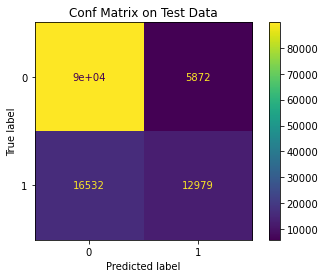

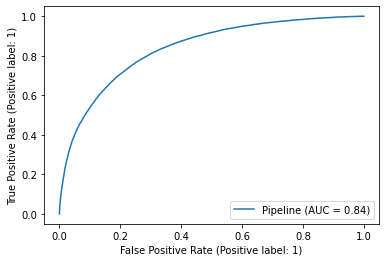

In [88]:
model_eval(XGBClassifier(learning_rate=0.1,max_depth=10,n_estimators=175))

### XG Boost Model Combining Grid Search 1 & 2 Results

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

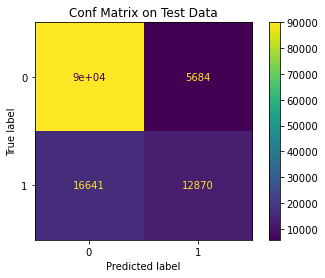

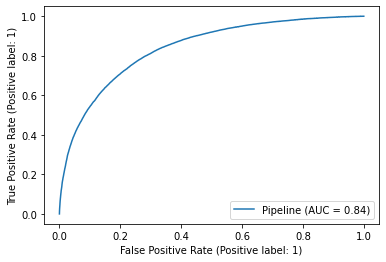

In [92]:
model_eval(XGBClassifier(learning_rate=0.1,max_depth=10,n_estimators = 175,reg_lambda =1,booster='gbtree',colsample_bytree=0.5,subsample=0.8))

After running couple of grid searches for learning rate, max_dept, n_estimators, reg_lambda, booster, colsample_bytree, subsample the XGboost model performance had improved significantly. The train score has increased to 0.859 while performance on test score increased to 0.8217. The performance on model increased to f1 scores on cross validation to 0.5262 while logloss of train and test reduced to 0.3308 and 0.3998. In the classification report accuracy of 0.82 reported while precision is 0.69 and recall reported as 0.44.

### 5.6 K-Neighbors Model

With the intention of obtain better results than XGboost model, KNN modeling process initiated.

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

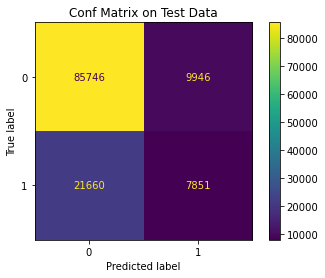

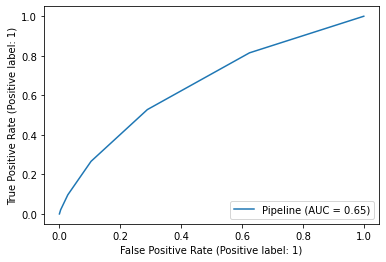

In [60]:
model_eval(KNeighborsClassifier(n_neighbors=5))

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

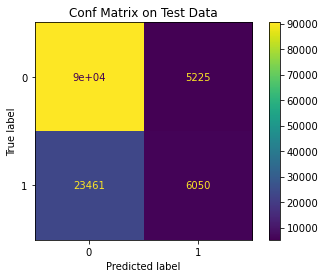

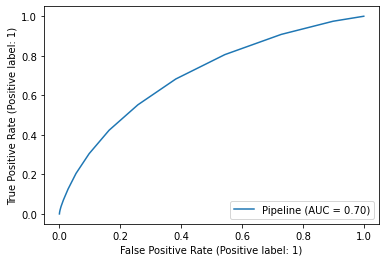

In [103]:
model_eval(KNeighborsClassifier(n_neighbors=15))

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

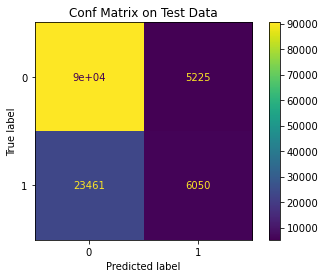

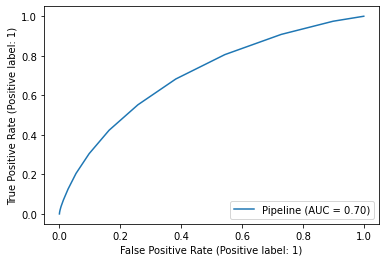

In [105]:
model_eval(KNeighborsClassifier(n_neighbors=15,leaf_size=30))

After running the KNN model for different combinations best score on train data generated is 0.7919 and test data is 0.7709. This below the performance of the XGBoost model.  

### 5.7 Random Forest Model

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

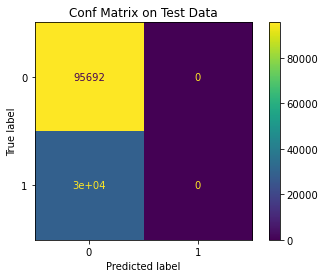

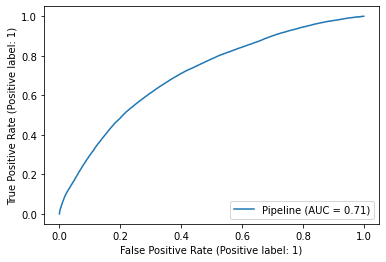

In [54]:
model_eval(RandomForestClassifier(max_depth=3))

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

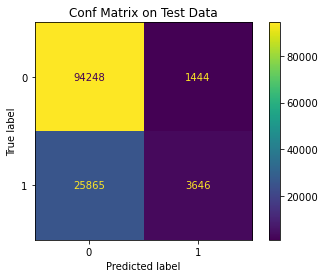

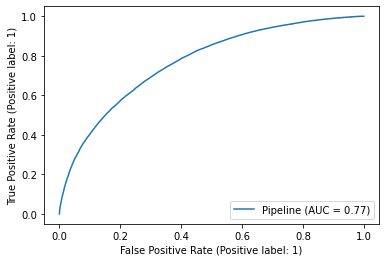

In [61]:
model_eval(RandomForestClassifier(min_samples_leaf=40, n_estimators=60))

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

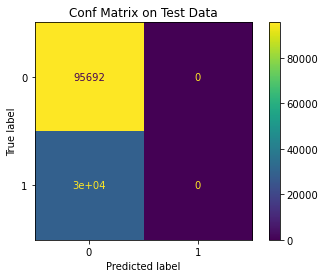

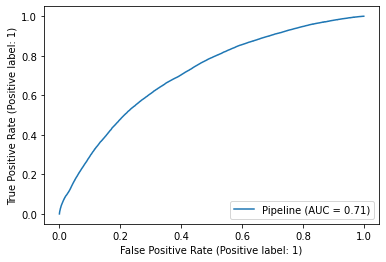

In [59]:
model_eval(RandomForestClassifier(n_estimators=50, max_depth=4))

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

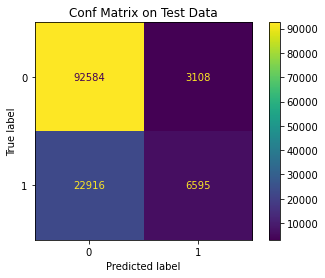

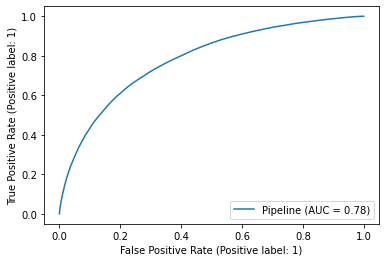

In [61]:
model_eval(RandomForestClassifier(max_features='sqrt'))

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

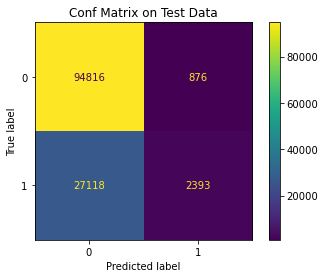

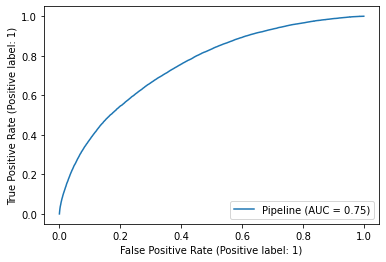

In [62]:
model_eval(RandomForestClassifier(min_samples_leaf=100, n_estimators=30))

### 5.7 Random Forest Model Grid Search

In [94]:
rf = RandomForestClassifier()
pipeline_rf = Pipeline(steps=[
    ('ct',CT),
    ('classifier', rf)])

pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                                 ('subpipe_cate',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['grade', 'sub_grade',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'pymnt_plan', 'purpose',
                                                   'addr_state',
                                                   'initial_list_status',
                                                   'application_type'])])),
                ('classifier', RandomForestClassifier())])

In [95]:
pipeline_rf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'ct', 'classifier', 'ct__n_jobs', 'ct__remainder', 'ct__sparse_threshold', 'ct__transformer_weights', 'ct__transformers', 'ct__verbose', 'ct__verbose_feature_names_out', 'ct__subpipe_num', 'ct__subpipe_cate', 'ct__subpipe_num__memory', 'ct__subpipe_num__steps', 'ct__subpipe_num__verbose', 'ct__subpipe_num__ss', 'ct__subpipe_num__ss__copy', 'ct__subpipe_num__ss__with_mean', 'ct__subpipe_num__ss__with_std', 'ct__subpipe_cate__memory', 'ct__subpipe_cate__steps', 'ct__subpipe_cate__verbose', 'ct__subpipe_cate__ohe', 'ct__subpipe_cate__ohe__categories', 'ct__subpipe_cate__ohe__drop', 'ct__subpipe_cate__ohe__dtype', 'ct__subpipe_cate__ohe__handle_unknown', 'ct__subpipe_cate__ohe__max_categories', 'ct__subpipe_cate__ohe__min_frequency', 'ct__subpipe_cate__ohe__sparse', 'ct__subpipe_cate__ohe__sparse_output', 'classifier__bootstrap', 'classifier__ccp_alpha', 'classifier__class_weight', 'classifier__criterion', 'classifier__max_depth', 'classifier__max_f

In [96]:
#Define the hyperparameters to tune
params ={
    'classifier__n_estimators':[60,80,100],
    'classifier__max_depth':[7,10,14],
    'classifier__min_samples_split' :[40,60,80] 
  }

#Define the grid search 
gs_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=params,
    cv=5,
    verbose=1
)

#Fit the grid search model
gs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         ['loan_amnt',
                                                                          'emp_length',
                                                                          'funded_amnt',
                                                                          'int_rate',
                                                                          'annual_inc',
                                                                          'dti',
                                                                          'open_acc',
                                                                          'pub_rec',
                                                                          'revol_bal',
                                                                          'revol_util',
                                                                          'total_acc',
                                                                          'Annual_Total_premium',
                                                                          'PTI',
                                                                          'term',
                                                                          'inq_last_6mths',
                                                                          'LTI']),
                                                                        ('subpipe_cate',
                                                                         Pipeli...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['grade',
                                                                          'sub_grade',
                                                                          'home_ownership',
                                                                          'verification_status',
                                                                          'pymnt_plan',
                                                                          'purpose',
                                                                          'addr_state',
                                                                          'initial_list_status',
                                                                          'application_type'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [7, 10, 14],
                         'classifier__min_samples_split': [40, 60, 80],
                         'classifier__n_estimators': [60, 80, 100]},
             verbose=1)

In [97]:
gs_rf.best_params_

{'classifier__max_depth': 14,
 'classifier__min_samples_split': 40,
 'classifier__n_estimators': 60}

In [98]:
filename = 'Model/rf_model.sav'
pickle.dump(gs_rf, open(filename, 'wb'))


In [99]:
rf_best = pickle.load(open(filename, 'rb'))

In [100]:
rf_train_score = round(rf_best.score(X_train,y_train),4)
rf_train_score

0.7772

In [101]:
rf_test_score= round(rf_best.score(X_test,y_test),4)
rf_test_score

0.7755

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

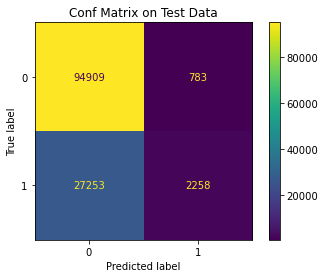

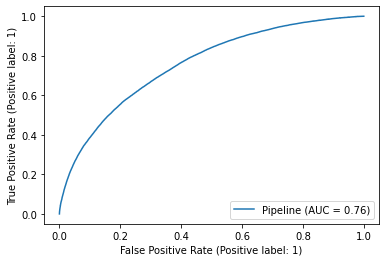

In [102]:
model_eval(RandomForestClassifier(max_depth=14,min_samples_split=40,n_estimators=60))

After running the Random Forest model for different parameter combinations and grid search best score generated for train data is 0.7779 while for test is 0.7761. Also f1 score is 0.14 and area under ROC curve is 0.76. These performance indicators are below the performance of XGBoost model.

### 5.8 Stacking Classifier

### 5.8.1 Stacking Classifier with XGBoost and Logistic Regression

In [59]:
stack = StackingClassifier(
    estimators=[
        ('Xgb', XGBClassifier(learning_rate=0.1,max_depth=10,n_estimators = 175,reg_lambda =1,booster='gbtree',colsample_bytree=0.5,subsample=0.8)),
        ('lr', LogisticRegression())
    ]
)  

    
pipeline_stack = Pipeline(steps=[
    ('ct',CT),
    ('classifier', stack)])

pipeline_stack.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                                 ('subpipe_cate',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncod...
                                                               interaction_constraints=None,
                                                               learning_rate=0.1,
                                                               max_delta_step=None,
                                                               max_depth=10,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=175,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=None,
                                                               reg_alpha=None,
                                                               reg_lambda=1,
                                                               scale_pos_weight=None,
                                                               subsample=0.8,
                                                               tree_method=None,
                                                               validate_parameters=None,
                                                               verbosity=None)),
                                                ('lr',
                                                 LogisticRegression())]))])

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

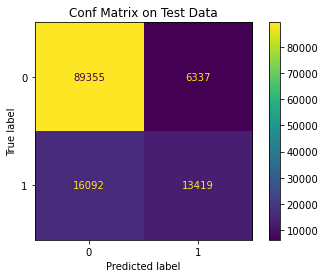

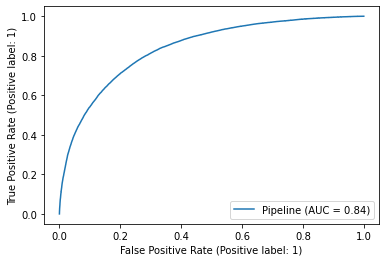

In [60]:
model_eff(estimator=pipeline_stack)

### 5.8.2 Stacking Classifier with XGBoost and Random Forest

In [61]:
stack = StackingClassifier(
    estimators=[
        ('Xgb', XGBClassifier(learning_rate=0.1,max_depth=10,n_estimators = 175,reg_lambda =1,booster='gbtree',colsample_bytree=0.5,subsample=0.8)),
        ('rf', RandomForestClassifier(max_depth=14,min_samples_split=40,n_estimators=60))
    ]
)  

    
pipeline_stack1 = Pipeline(steps=[
    ('ct',CT),
    ('classifier', stack)])

pipeline_stack1.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                                 ('subpipe_cate',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncod...
                                                               max_depth=10,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=175,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=None,
                                                               reg_alpha=None,
                                                               reg_lambda=1,
                                                               scale_pos_weight=None,
                                                               subsample=0.8,
                                                               tree_method=None,
                                                               validate_parameters=None,
                                                               verbosity=None)),
                                                ('rf',
                                                 RandomForestClassifier(max_depth=14,
                                                                        min_samples_split=40,
                                                                        n_estimators=60))]))])

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

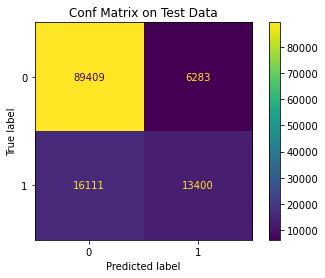

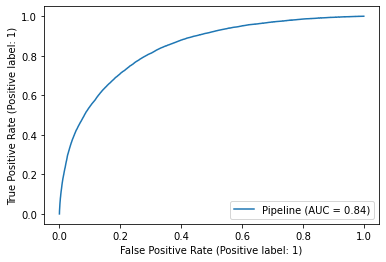

In [63]:
model_eff(estimator=pipeline_stack1)

### 5.8.3 Stacking Classifier with XGBoost, Random Forest and Logistic Regression

In [81]:
stack = StackingClassifier(
    estimators=[
        ('Xgb', XGBClassifier(learning_rate=0.1,max_depth=10,n_estimators = 175,reg_lambda =1,booster='gbtree',colsample_bytree=0.5,subsample=0.8)),
        ('rf', RandomForestClassifier(max_depth=14,min_samples_split=40,n_estimators=60)),
        ('lr', LogisticRegression())
    ]
)  

    
pipeline_stack2 = Pipeline(steps=[
    ('ct',CT),
    ('classifier', stack)])

pipeline_stack2.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                                 ('subpipe_cate',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncod...
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=175,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=None,
                                                               reg_alpha=None,
                                                               reg_lambda=1,
                                                               scale_pos_weight=None,
                                                               subsample=0.8,
                                                               tree_method=None,
                                                               validate_parameters=None,
                                                               verbosity=None)),
                                                ('rf',
                                                 RandomForestClassifier(max_depth=14,
                                                                        min_samples_split=40,
                                                                        n_estimators=60)),
                                                ('lr',
                                                 LogisticRegression())]))])

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

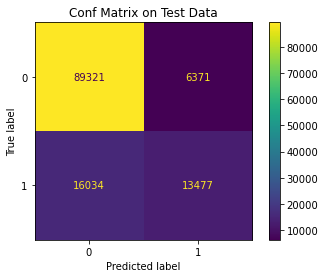

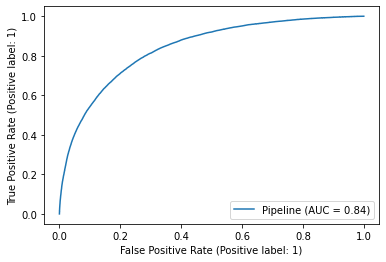

In [82]:
model_eff(estimator=pipeline_stack2)

Out of stacking classifier models, stacking with XG Boost and logistic regression produced the best model performance. The model produced 0.859 score on train data and 0.8209 score on test data. The logloss of 0.333 and 0.405 produced on train and test data respectively. On the other hand accuracy of 0.82 and 0.84 of area under ROC curve performance exhibit. The f1 score on cross validation for the model is 0.538.

The stacking model with XG Boost and logistic regression shows in par performance compared to XG boost model.

## 5.9 Models with SMOTE

The dataset considered for modeling is imbalanced. Therefore took the approach to balance the dataset and conduct modeling process to observe whether different results produce through these models.

### 5.9.1 Random Forest with SMOTE

In [77]:
rf_clf = RandomForestClassifier(max_depth=14,min_samples_split=40,n_estimators=60)
smote_sampler = SMOTE(random_state=9)
pipeline_rf = Pipeline(steps=[
    ('ct',CT),
    ('smote', smote_sampler),
    ('classifier', rf_clf)])

pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                                 ('subpipe_cate',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['grade', 'sub_grade',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'pymnt_plan', 'purpose',
                                                   'addr_state',
                                                   'initial_list_status',
                                                   'application_type'])])),
                ('smote', SMOTE(random_state=9)),
                ('classifier',
                 RandomForestClassifier(max_depth=14, min_samples_split=40,
                                        n_estimators=60))])

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

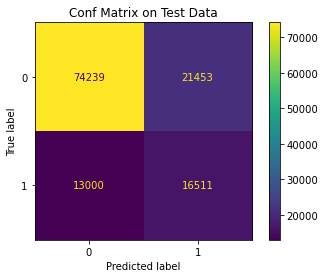

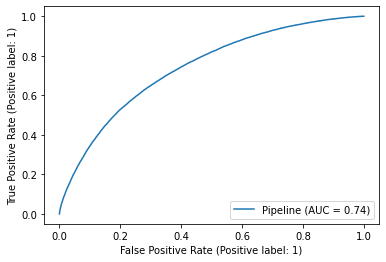

In [78]:
model_eff(estimator=pipeline_rf)

### 5.9.2 XG Boost with SMOTE

In [26]:
XB_clf1 = XGBClassifier(learning_rate=0.1,max_depth=10,n_estimators = 175,reg_lambda =1,booster='gbtree',colsample_bytree=0.5,subsample=0.8)
smote_sampler = SMOTE(random_state=9)
pipeline_XB1 = Pipeline(steps=[
    ('ct',CT),
    ('smote', smote_sampler),
    ('classifier', XB_clf1)])

pipeline_XB1.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                                 ('subpipe_cate',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncod...
                               colsample_bytree=0.5, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=10,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=175,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.8, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

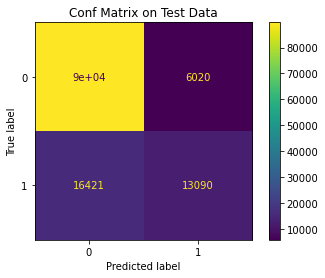

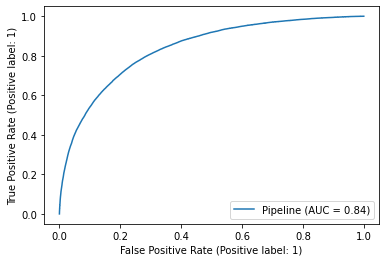

In [27]:
model_eff(estimator=pipeline_XB1)

Considering the XGboost and Random forest with SMOTE, the XGboost model with SMOTE shows better performance. The model performance on train score is 0.8456 and test score is 0.821. Also logloss on train and test data are 0.357 and 0.402 respectively. The f1 score for the model is 0.53. The accuracy and area under ROC curve performed in par with the XG boost withou SMOTE model.

## Model Comparisons

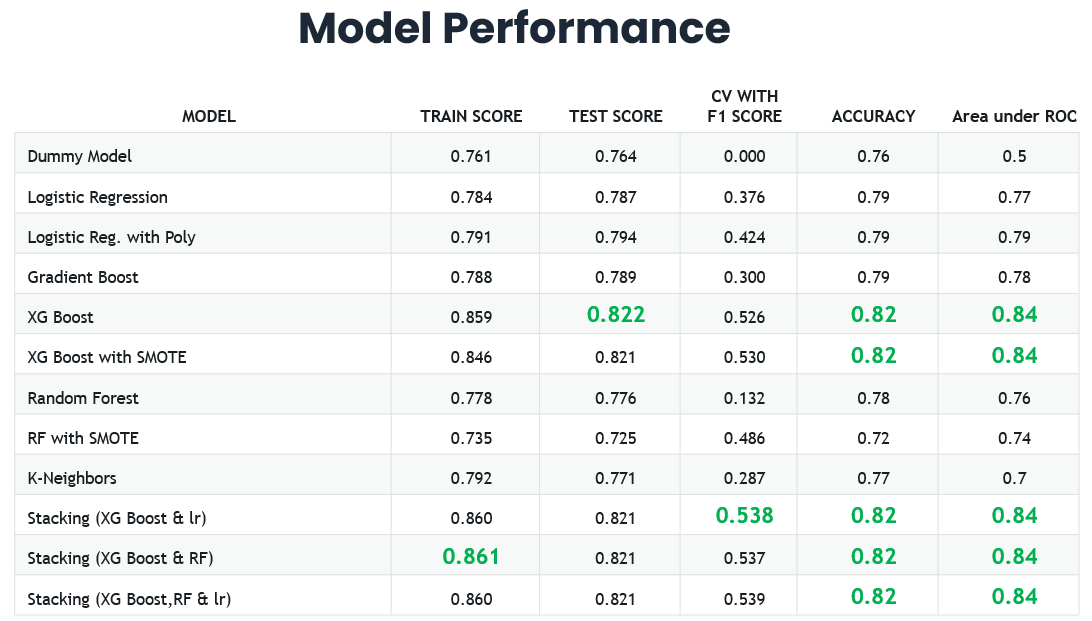

Considering the model complexity, it was decided to select XGboost model as the final model eventhough stacking model produce only marginally improved results compared to XGboost.

## 6. Final Model

The selected final model to train combining the train dataset and test data set. The trained final model to test using unseen dataset divided at the begining. 

In [19]:
X_train_total = pd.concat([X_train,X_test])

In [20]:
y_train_total = pd.concat([y_train,y_test])

In [89]:
XB_clf_final = XGBClassifier(learning_rate=0.1,max_depth=10,n_estimators = 175,reg_lambda =1,booster='gbtree',colsample_bytree=0.5,subsample=0.8)
pipeline_XB_final = Pipeline(steps=[
    ('ct',CT),
    ('classifier', XB_clf_final)])

pipeline_XB_final.fit(X_train_total, y_train_total)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                                 ('subpipe_cate',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncod...
                               colsample_bytree=0.5, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=10,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=175,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.8, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [90]:
filename = 'Model/Xgboost_model_final.sav'
pickle.dump(pipeline_XB_final, open(filename, 'wb'))
XGB_final = pickle.load(open(filename, 'rb'))

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

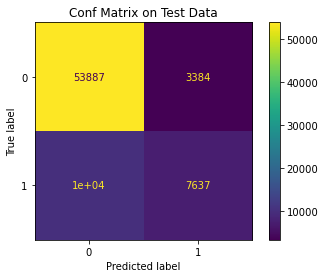

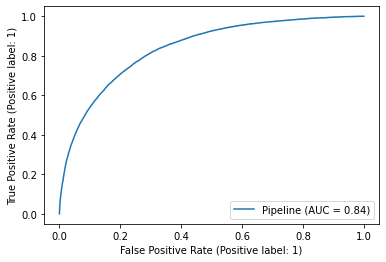

In [91]:
model_eff(estimator=XGB_final,X_train=X_train_total, X_test=X_val, y_train=y_train_total, y_test=y_val)

After training on the combined dataset and validate the model performance on unseen data, the model has performed similar to the performance with train and test dataset. The reported performance score on combined data is 0.8535 while on unseen data model score of 0.819. The log loss reported on combined data and unseen data were 0.3392 and 0.4015 respectively. The reported f1 score on cross validation for the final model is 0.531. The accuracy reported for the model is 0.82 while area under the roc curve is 0.84.

### 6.1 Row wise Prediction of the Dataset Using the Model

This is to get row wise prediction of loan default status.

In [93]:
preds = XGB_final.predict(X_val)

In [94]:
X_preds = X_val.copy()

In [95]:
X_preds['Predicted Churn'] = preds

In [96]:
X_preds['Actual Churn'] = y_val

In [97]:
X_preds.head()

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_last_major_derog,mths_since_last_record,mths_since_last_delinq,batch_enrolled,loan_amnt,funded_amnt,funded_amnt_inv,...,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,Annual_Total_premium,PTI,LTI,Predicted Churn,Actual Churn
member_id,,,,,,,,,,,,,,,,,,,,,
7127018,0.0,83670.0,34400.0,44.0,70.0,33.0,,8000,8000,8000.0,...,0.0,0.0,INDIVIDUAL,87th week,0.0,3342.463605,0.037138,0.088889,1,1
28410900,83.0,44678.0,12800.0,44.0,70.0,10.0,BAT2003848,10000,10000,10000.0,...,0.0,0.0,INDIVIDUAL,70th week,0.0,4195.775133,0.110415,0.263158,0,0
46876224,0.0,167356.0,43500.0,44.0,70.0,31.0,,13625,13625,13625.0,...,0.0,0.0,INDIVIDUAL,13th week,0.0,6036.332123,0.194720,0.439516,0,1
31697315,0.0,104398.0,70300.0,44.0,70.0,3.0,BAT2078974,16000,16000,16000.0,...,0.0,0.0,INDIVIDUAL,65th week,0.0,4238.985132,0.060557,0.228571,0,0
11577133,0.0,147285.0,8300.0,44.0,70.0,31.0,BAT5629144,20000,20000,20000.0,...,0.0,0.0,INDIVIDUAL,109th week,0.0,7368.876402,0.163753,0.444444,0,0


## 6.2 Feature Importance

<AxesSubplot:>

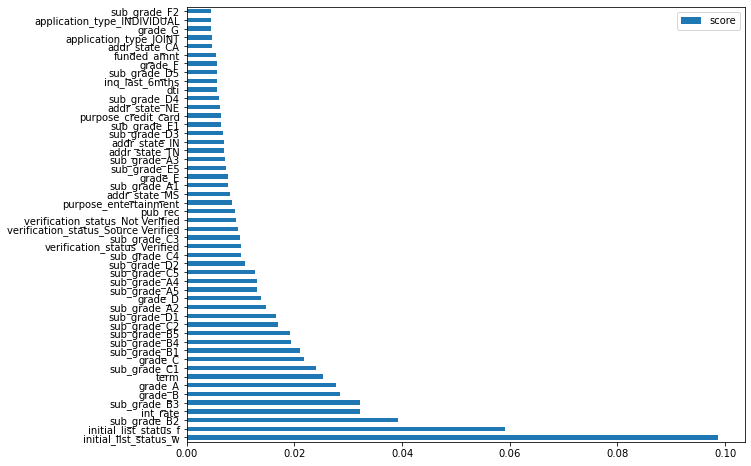

In [144]:
column_trans = XGB_final.named_steps['ct']
original_column_names = column_trans.get_feature_names_out()

features = []
for item in original_column_names:
    if "subpipe_cate__" in item:
        var = item.replace("subpipe_cate__", "")
    else:
        var = item.replace("subpipe_num__", "")
    features.append(var)

model_step = XGB_final.named_steps['classifier']
feature_important = model_step.feature_importances_


feat_import = {name: score 
                   for name, score 
                       in zip(features, feature_important)
}
keys = list(feat_import.keys())
values = list(feat_import.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(50, columns="score").plot(kind='barh', figsize = (10,8)) ## plot top 40 features

As indicated above graph important features for the model are credit grade, credit sub grade, initial list status, verification status, interest rate, dti and inquiry status within last 6 months.

## 7. Conclusion

It is recommended XGBoost as the best model with test score of 0.819 and logloss of 0.402 on unseen data for creditworthiness prediction. The stacking models had perfomed slightly higher with test 0.821 and logloss of 0.405. Considering the complexitity of stacking model it was decided to conclude XGBoost as the best model algorithm.

### Final Recommendation : DefaultShield

XGBoost classifier with following parameters
    
    booster='gbtree'
    learning_rate=0.1
    max_depth=10
    n_estimators = 175
    reg_lambda =1
    colsample_bytree=0.5
    subsample=0.8
    
The model achieved accuracy of 0.82 with f1 score on crossvalidation of 0.531.